<a href="https://colab.research.google.com/github/huanshenyi/GPT_scout_automation/blob/main/len_transformers_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 33.5 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
import pandas as pd

output = classifier("センチメントとは？ センチメントは「感情分析」ともいい、「ある状況や出来事に対する見方や態度、意見」と定義されています。 センチメント分析は、テキストを分析し、そのテキストが表現している意見を特定します。 その上でその意見には、「ポジティブ」（肯定的）"
)
pd.DataFrame(output)

,label,score
0,NEGATIVE,0.927469


In [ ]:
## 固有表現抽出
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger("センチメントとは？ センチメントは「感情分析」ともいい、「ある状況や出来事に対する見方や態度、意見」と定義されています。 センチメント分析は、テキストを分析し、そのテキストが表現している意見を特定します。 その上でその意見には、「ポジティブ」（肯定的）")
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,MISC,0.464364,##い,56,57


In [ ]:
## 回答
reader = pipeline("question-answering")
question = "What does customer want?"
outputs = reader(question=question, context="センチメントとは？ センチメントは「感情分析」ともいい、「ある状況や出来事に対する見方や態度、意見」と定義されています。 センチメント分析は、テキストを分析し、そのテキストが表現している意見を特定します。 その上でその意見には、「ポジティブ」（肯定的）")
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.002923,23,27,ともいい


In [ ]:
## 要約
summarizer = pipeline("summarization")
outputs = summarizer("センチメントとは？ センチメントは「感情分析」ともいい、「ある状況や出来事に対する見方や態度、意見」と定義されています。 センチメント分析は、テキストを分析し、そのテキストが表現している意見を特定します。 その上でその意見には、「ポジティブ」（肯定的）", max_length=56, clean_up_tokenization_spaces=True)
print(outputs[0]["summary_text"])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 �ンチメント:    ‘感情分析’: ‘‘’;  ‘I’m sorry.’’. ‘We’ll


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from datasets import list_datasets

all_dataset = list_datasets()
print(f"There are {len(all_dataset)} datases curen...")
print(all_dataset[:10])

There are 20826 datases curen...
['venetis/my-test-dataset', 'venetis/amazon-shoe-reviews', 'venetis/customer_support_sentiment_on_twitter', 'venetis/consumer_complaint_kaggle', 'venetis/twitter_us_airlines_kaggle', 'venetis/VMMRdb_make_model', 'venetis/VMMRdb_make_model_splits', 'venetis/VMMRdb_make_model_train', 'venetis/VMMRdb_make_model_val', 'venetis/VMMRdb_make_model_test']


In [ ]:
from datasets import load_dataset

emotions = load_dataset("emotion")
print(emotions)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train_ds =  emotions["train"]
len(train_ds)

16000

In [ ]:
train_ds[0]
train_ds.column_names

['text', 'label']

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
train_ds["text"][:5]

'i didnt feel humiliated'

In [ ]:
# from datasets import load_dataset

# emotions_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text', 'label','day'])

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-90be33dc65273d13/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# emotions_local['train'][0]

{'text': 123, 'label': '数字', 'day': '今日'}

In [ ]:
import pandas as pd
# print(emotions['train'].features)
# 'sadness', 'joy', 'love', 'anger', 'fear', 'surprise'
# fear = 恐れ, joy = 喜び
emotions.set_format(type="pandas")
df = emotions['train'][:]
df.head()

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
  return emotions["train"].features['label'].int2str(row)

df["label_name"] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


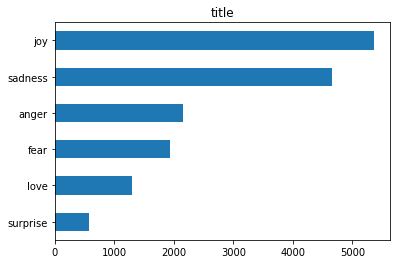

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("title")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


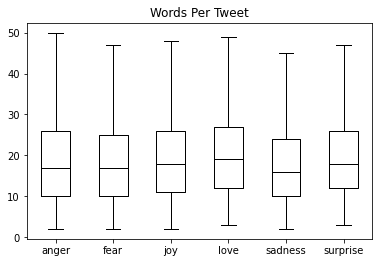

In [ ]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
df['text'].head().str.split()

0                         [i, didnt, feel, humiliated]
1    [i, can, go, from, feeling, so, hopeless, to, ...
2    [im, grabbing, a, minute, to, post, i, feel, g...
3    [i, am, ever, feeling, nostalgic, about, the, ...
4                            [i, am, feeling, grouchy]
Name: text, dtype: object

In [ ]:
emotions.reset_format()
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [ ]:
text = 'tokenizing text is a core task of nlp'
tokenized_text = list(text)
token2idx = {value: key for key, value in enumerate(sorted(set(tokenized_text)))}
print(tokenized_text)
print(token2idx)

['t', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'n', 'l', 'p']
{' ': 0, 'a': 1, 'c': 2, 'e': 3, 'f': 4, 'g': 5, 'i': 6, 'k': 7, 'l': 8, 'n': 9, 'o': 10, 'p': 11, 'r': 12, 's': 13, 't': 14, 'x': 15, 'z': 16}


In [ ]:
pd.get_dummies(categorical_df["Name"])

,B,Me,Optimus
0,1,0,0
1,0,0,1
2,0,1,0


In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[14, 10, 7, 3, 9, 6, 16, 6, 9, 5, 0, 14, 3, 15, 14, 0, 6, 13, 0, 1, 0, 2, 10, 12, 3, 0, 14, 1, 13, 7, 0, 10, 4, 0, 9, 8, 11]


In [ ]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

<ipython-input-64-6e4736d935b2>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)


torch.Size([37, 17])

In [ ]:
text = "Tokenizing text is a core task of NLP."

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text["input_ids"])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
"""
{'text': [
  'i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'
  ],
 'label': [0, 0]}
"""

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
